In [105]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
np.seterr(divide='ignore')

data = pd.read_csv('C:/Users/david/Desktop/maturitni_prace/data_analysis_python/nelinearita.csv', sep=',', header=None)

threshold = 760             #hranice kde se meni z primky na linearne klesajici
energy_calibration = 0.049259427501417714 #kdyz kalibrace je Energy = a * channel + b, tak toto je a

chanell_err = np.array([])
energy = np.array([])       #tabulkova energie
difference = np.array([])   #rozdil mezi energii tabulkovou a energii namerenou
for j in range(len(data)):
    energy = np.append(energy, float(data[0][j]))
    difference = np.append(difference, float(data[1][j]))
    chanell_err = np.append(chanell_err, float(data[2][j]))
print(chanell_err)
energy_err = chanell_err * energy_calibration
print(energy_err)

[0.015 0.041 0.062 0.045 0.015 0.039 0.343 0.024 0.225 0.121 0.103 0.566
 0.67  2.601 0.642 1.498 0.673 0.429 1.143 1.585 1.143 0.019 0.459 0.46
 0.582 0.074 0.688 0.938 0.136 0.087 0.051 0.147]
[0.00073889 0.00201964 0.00305408 0.00221667 0.00073889 0.00192112
 0.01689598 0.00118223 0.01108337 0.00596039 0.00507372 0.02788084
 0.03300382 0.12812377 0.03162455 0.07379062 0.03315159 0.02113229
 0.05630353 0.07807619 0.05630353 0.00093593 0.02261008 0.02265934
 0.02866899 0.0036452  0.03389049 0.04620534 0.00669928 0.00428557
 0.00251223 0.00724114]


In [106]:
def fce(x, a, b):
    return (a * (x**2) + b * x) * np.heaviside((x-threshold),0)
    

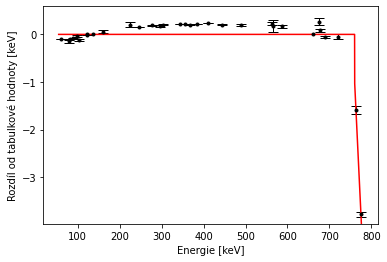

In [107]:
pars, cov = curve_fit(f=fce, xdata=energy, ydata=difference)

p = np.linspace(min(energy)-5, max(energy)+5, 100000)
plt.errorbar(energy, difference, yerr=energy_err, fmt=".", elinewidth=1, capsize=5, ecolor='black',color='black')
plt.plot(p, fce(p, *pars), c="red")
plt.ylabel("Rozdíl od tabulkové hodnoty [keV]")
plt.xlabel("Energie [keV]")
plt.ylim(ymin=min(difference)-0.2)
plt.savefig('nelineaita3.png', dpi = 400)

-2.821309572402064e-06 0.0022540250802898353 -0.23104960366585042 -0.1853732859342041 -0.9752290502659464


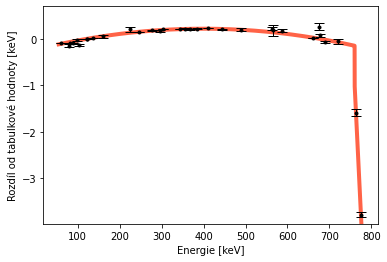

In [109]:
def fit(x, a,b,c,e,f):
    return (a*x**2 + b*x + c) + ((e*(x-threshold)+f)-(a*x**2 + b*x+ c))*np.heaviside((x-threshold),0)

pars, cov = curve_fit(f=fit, xdata=energy, ydata=difference, sigma=energy_err)
print(*pars)
p = np.linspace(min(energy)-5, max(energy)+5, 100000)
plt.plot(p, fit(p, *pars),linewidth = 4, c="tomato")
plt.errorbar(energy, difference, yerr=energy_err, fmt=".", elinewidth=1, capsize=5, ecolor='black',color='black')
plt.ylabel("Rozdíl od tabulkové hodnoty [keV]")
plt.xlabel("Energie [keV]")
plt.ylim(ymin=min(difference)-0.2, ymax = 0.7)
plt.savefig('nelineaita4.png', dpi = 400)